In [255]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt

import math, time
import itertools
import datetime
from operator import itemgetter
from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


import pandas as pd
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import Series

from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM


## Load the stock data

### Choose CSV file of the company stock price

In [35]:
! ls

AAPL.csv	     livelossplot-master.zip  Stock-Predictor-using-LSTM.ipynb
AMZN.csv	     lstm.py		      Test.ipynb
FB.csv		     model.h5		      TSLA.csv
FBdata.csv	     model.json		      TSLAdata.csv
fb.ipynb	     NFLX.csv		      Untitled.ipynb
GOOG.csv	     stock_LSTM-Copy1.ipynb
livelossplot-master  stock_LSTM.ipynb


In [36]:
# Insert the stock price here 

amazon = pd.read_csv('AMZN.csv')

col_names = ['Timestamp','Sequence','Open','High','Low','Close_amazon','Volume']
amazon.columns = col_names
amazon['Timestamp'] =  pd.to_datetime(amazon['Timestamp'],format='%Y-%m-%d %H:%M:%S')
amazon.index = amazon['Timestamp']
amazon = amazon.drop(['Sequence','Timestamp'],axis =1)
amazon.head()

,Open,High,Low,Close_amazon,Volume
Timestamp,,,,,
2018-03-12 15:49:00,1598.5920,1600.2700,1598.4625,1599.860,26188
2018-03-12 15:50:00,1599.0000,1599.2500,1598.7000,1598.750,4850
2018-03-12 15:51:00,1599.0611,1599.3300,1598.7100,1598.905,6488
2018-03-12 15:52:00,1597.7900,1598.8357,1597.7700,1598.700,10751
2018-03-12 15:53:00,1598.7750,1599.0000,1597.8900,1598.290,1940


In [37]:
# Insert the stock price here 

apple = pd.read_csv('AAPL.csv')
col_names = ['Timestamp','Sequence','Open','High','Low','Close_apple','Volume']
apple.columns = col_names
apple['Timestamp'] =  pd.to_datetime(apple['Timestamp'],format='%Y-%m-%d %H:%M:%S')
apple.index = apple['Timestamp']
apple = apple.drop(['Sequence','Timestamp'],axis =1)
apple.head()

,Open,High,Low,Close_apple,Volume
Timestamp,,,,,
2018-03-12 15:49:00,181.5762,181.750,181.5762,181.6900,48721
2018-03-12 15:50:00,181.6986,181.710,181.5700,181.5745,51915
2018-03-12 15:51:00,181.6600,181.720,181.6400,181.6924,32218
2018-03-12 15:52:00,181.5100,181.675,181.5000,181.6700,62321
2018-03-12 15:53:00,181.7200,181.720,181.5100,181.5200,34506


In [38]:
df1 = apple[['Close_apple']]
df1 = df1.loc['2018-03-14']
df1.shape

(391, 1)

In [39]:
df2 = amazon[['Close_amazon']]
df2 = df2.loc['2018-03-14']
df2.shape

(391, 1)

In [40]:
result = pd.concat([df1, df2], axis=1)
result.shape

(391, 2)

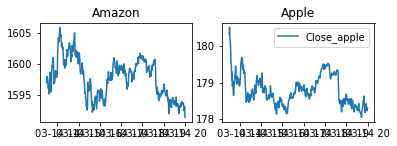

In [41]:
plt.subplot(2,2,1)
plt.plot(result.index,result.Close_amazon)
plt.title('Amazon')
plt.subplot(2,2,2)
plt.plot(result.index,result.Close_apple)
plt.title('Apple')
plt.legend()
plt.show()

## Visualisation

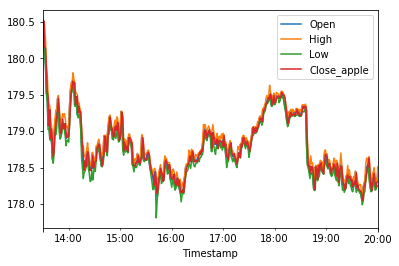

In [42]:
apple = apple.drop(['Volume'],axis=1)
plt.figure(figsize=(15,8))
apple.loc['2018-03-14'].plot()
plt.show()

## Spilt the data to train and test

### We choose 291 minute of stock price data and 100 mintutes to predict the stock price.
***
### Similarly we can change this to any  'X' value and make prediction of rest (391-X) points

In [12]:
train_data =result.iloc[:-50]
train_data.shape

(341, 2)

In [13]:
test_data = result.iloc[-50:]
test_data.shape

(50, 2)

In [231]:
series1 = result["Close_apple"]
series2 = result["Close_amazon"]

In [232]:
# transform data to be stationary
raw_values1 = series1.values
diff_values1 = difference(raw_values1, 1)

raw_values2 = series2.values
diff_values2 = difference(raw_values2, 1)

In [233]:
# transform data to be supervised learning
supervised1 = timeseries_to_supervised(diff_values1, 4)
supervised_values1 = supervised1.values

supervised2 = timeseries_to_supervised(diff_values2, 4)
supervised_values2 = supervised2.values

In [234]:
train1, test1 = supervised_values1[0:-100], supervised_values1[-100:]
scaler, train_scaled1, test_scaled1 = scale(train1, test1)

train2, test2 = supervised_values2[0:-100], supervised_values2[-100:]
scaler, train_scaled2, test_scaled2 = scale(train2, test2)

In [235]:
merge_train = np.insert(train1[:,:-1],[4],train2[:,:-1], axis=1)
merge_train.shape

(290, 8)

In [236]:
merge_test = np.insert(test2[:,:-1],[4],test2[:,:-1], axis=1)
merge_test.shape

(100, 8)

In [237]:
l1 = train1[:,-1].reshape(train1[:,-1].shape[0],1)
l2 = train2[:,-1].reshape(train2[:,-1].shape[0],1)
merge_train_output = np.concatenate((l1,l2),axis=1)
merge_train_output.shape

(290, 2)

In [238]:
l1 = test1[:,-1].reshape(test1[:,-1].shape[0],1)
l2 = test2[:,-1].reshape(test2[:,-1].shape[0],1)
merge_test_output = np.concatenate((l1,l2),axis=1)
merge_test_output.shape

(100, 2)

In [239]:
X, y = merge_train, merge_train_output

In [240]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

In [241]:
X, y = merge_train, merge_output
X = X.reshape(X.shape[0], 1, X.shape[1])
X.shape

(290, 1, 8)

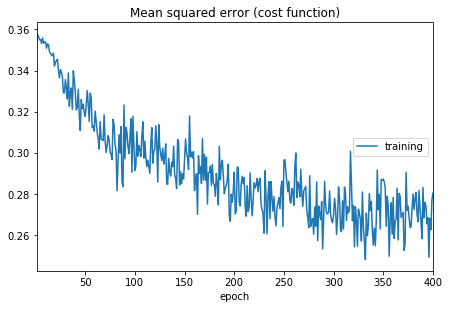

In [278]:
X, y = merge_train, merge_output
X = X.reshape(X.shape[0], 1, X.shape[1])


model = Sequential()

print()
model.add(LSTM(8, batch_input_shape=(1, X.shape[1], X.shape[2]), stateful=True,return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(16,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(8,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=2))
model.add(Activation('linear'))

#model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
#model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=1, shuffle=False,callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1, mode='min')])

#for i in range(500):
#print("Completed :",i+1,"/",500, "Steps")
model.fit(X, y, epochs=400, batch_size=1, verbose=0, shuffle=False,callbacks=[plot_losses])
model.reset_states()

In [279]:
def forecast_lstm(model, X):
    y = model.predict(X)
    return y

t1 = merge_train[-1:,:4]
t2 = merge_train[-1:,4:]

base_apple = result.iloc[290][0]
base_amazon = result.iloc[290][1]

pred_apple = []
pred_amazon = []

prediction = np.zeros((100,2))

for i in range(100):
    
    test_pred = np.concatenate((t1[:,i:],t2[:,i:]),axis=1)
    input_data = test_pred.reshape(1, 1, 8)
    y = forecast_lstm(model,input_data)
    prediction[i] = y
    y1, y2 = y[0][0], y[0][1]
    
    t1 = np.insert(t1,[i+4],y1, axis=1)
    t2 = np.insert(t2,[i+4],y1, axis=1)  
    
    
    tem1 = base_apple + y1
    tem2= base_amazon+ y2
    
    pred_apple.append(tem1)
    pred_amazon.append(tem2)
    
sqrt(mean_squared_error(merge_test_output, prediction))    

0.47500492710473363

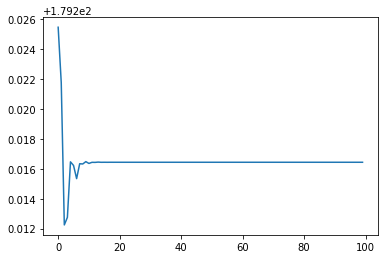

In [280]:
plt.plot(pred_apple)
plt.show()

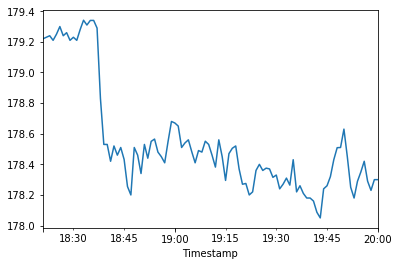

In [281]:
result.iloc[-100:]['Close_apple'].plot()
plt.show()

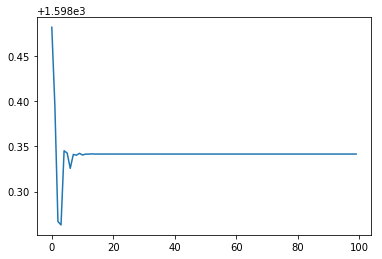

In [282]:
plt.plot(pred_amazon)
plt.show()

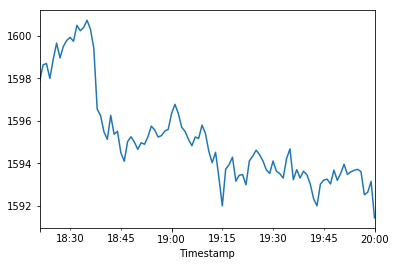

In [283]:
result.iloc[-100:]['Close_amazon'].plot()
plt.show()

In [251]:
result.iloc[290]

Close_apple      179.22
Close_amazon    1598.41
Name: 2018-03-14 18:20:00, dtype: float64

In [249]:
result.iloc[290][0]

179.22

In [250]:
result.iloc[290][1]

1598.4100000000001

In [284]:
#temp3 = base_value  + y_hat
#base_value = temp3
#prediction.append(temp3)

# Modeling

In [63]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data

class resetStates():
    def on_epoch_end(self, epoch, logs=None):
        self.model.reset_states()

def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    print(X.shape)
    model = Sequential()
    
    print(X.shape)
    model.add(LSTM(8, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True,return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(4,return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.add(Activation('linear'))
    
    #model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    #model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    #model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=1, shuffle=False,callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1, mode='min')])

    for i in range(nb_epoch):
        print("Completed :",i+1,"/",nb_epoch, "Steps")
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
        model.reset_states()

    return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

'''

# load dataset
series = train_data["Close"]


# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 4)
supervised_values = supervised.values


# split data into train and test-sets
train, test = supervised_values[0:-1], supervised_values[-1:]


# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

print(train_scaled.shape)
# fit the model
lstm_model = fit_lstm(train, 1, 400, 10)


# serialize model to JSON
model_json = lstm_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
lstm_model.save_weights("model.h5")
print("Saved model to disk")
'''

'\n\n# load dataset\nseries = train_data["Close"]\n\n\n# transform data to be stationary\nraw_values = series.values\ndiff_values = difference(raw_values, 1)\n\n# transform data to be supervised learning\nsupervised = timeseries_to_supervised(diff_values, 4)\nsupervised_values = supervised.values\n\n\n# split data into train and test-sets\ntrain, test = supervised_values[0:-1], supervised_values[-1:]\n\n\n# transform the scale of the data\nscaler, train_scaled, test_scaled = scale(train, test)\n\nprint(train_scaled.shape)\n# fit the model\nlstm_model = fit_lstm(train, 1, 400, 10)\n\n\n# serialize model to JSON\nmodel_json = lstm_model.to_json()\nwith open("model.json", "w") as json_file:\n    json_file.write(model_json)\n# serialize weights to HDF5\nlstm_model.save_weights("model.h5")\nprint("Saved model to disk")\n'

## Load the saved model

In [157]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
lstscaled_df1,scaled_df2 = scale(df1.values,df2.values)m_model = model_from_json(loaded_model_json)
# load weights into new model
lstm_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


# Prediction of the new stock price

In [254]:
scaler, train_scaled, test_scaled = scale(train, test)


# Feed last 4 mintutes difference of stock price after which we want to predict the stock price
test_scaled = test[:,:-1]

# Actual price of stock at 290 index of stock price
base_value = df.iloc[290].values

prediction = []

# Forecast for the next 100 points we can change the value according to our choice
for i in range(100):
    input_data = test_scaled[:,i:]
    input_data = input_data.reshape(input_data.shape[1], 1, 1)
    y_hat = forecast_lstm(lstm_model,1,input_data)
    test_scaled = np.insert(test_scaled,[i+4],y_hat, axis=1)
    temp3 = base_value + y_hat
    base_value = temp3
    prediction.append(temp3)

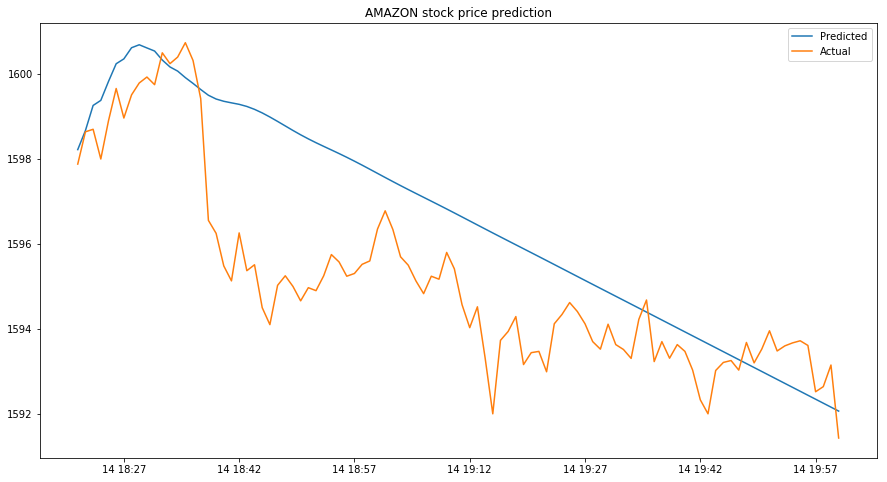

In [263]:
plt.figure(figsize=(15,8))
plt.plot(test_data.index,prediction,label='Predicted')
plt.plot(test_data.index,test_data.values,label='Actual')
plt.legend()
plt.title('AMAZON stock price prediction')
plt.show()

## Mean square error of the predicted values

In [264]:
rmse = sqrt(mean_squared_error(test_data.values, prediction))
rmse

2.023168903423593

## Probability of the forcasted stock price can't be possible as it will detect the pattern in the form of a algebric equation. And probabilty is only possible for classification method.